# TTT4185 Machine learning for Speech technology

## Computer assignment 2: Classification using the Bayes Decision Rule and Support Vector Machines

This assignment assumes that the student has knowledge about the Bayes Decision Rule, maximum likelihood estimation and support vector machines.

In this assignment we will use `scikit-learn` (http://scikit-learn.org/stable/), which is a powerful and very popular Python toolkit for data analysis and machine learning, and `pandas` (https://pandas.pydata.org), which implements the all-powerful `DataFrame`.

In this assigment we will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition the speaker ID and the gender of the speaker are given for each phoneme.

### Problem 1

In this problem we will use the Bayes decision rule to classify vowels based on their formants. The formants have been extracted from the open database `VTR Formants database` (http://www.seas.ucla.edu/spapl/VTRFormants.html) created by Microsoft and UCLA.

(a) Download the files `Train.csv` and `Test.csv` from Blackboard, and load them into a `pandas` dataframe using the command `pd.read_csv`. Using the training data, create a single scatter plot of "F1" vs "F2" for the three vowels
- "ae" as in "bat"
- "ey" as in "bait"
- "ux" as in "boot"

Just eyeing the plots, discuss which classes will be hardest to classify correctly.

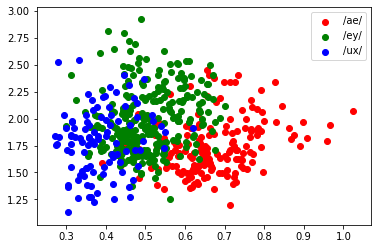

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

# Load data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

# Extract vowels
aes = train[train["Phoneme"] == 'ae']
eys = train[train["Phoneme"] == 'ey']
uxs = train[train["Phoneme"] == 'ux']

# Plotting here
%matplotlib inline
plt.scatter(aes['F1'], aes['F2'], c="r", label="/ae/")
plt.scatter(eys['F1'], eys['F2'], c="g", label="/ey/")
plt.scatter(uxs['F1'], uxs['F2'], c="b", label="/ux/")
plt.legend()

/ae/ and /ey/ are actually quite linearly separable. But /ux/ is all over the place, and so it should be hard to classify.

(b) Use the Bayes Decision Rule to create a classifier for the phonemes 'ae', 'ey' and 'ux' under the following constraints:
- The feature vector $x$ contains the first two formants, "F1" and "F2".
- The distribution of $x$ given a phoneme $c$, $P(x|c)$, is Gaussian.
- Use the maximum likelihood estimator to estimate the model parameters.

Test your classifier on the 'ae', 'ey' and 'ux' phonemes from the test set and present your results in a _confusion matrix_, that is, a table where you see how many times 'ae' was correctly classified, how many times it was wrongly classified as 'ey' and so on.

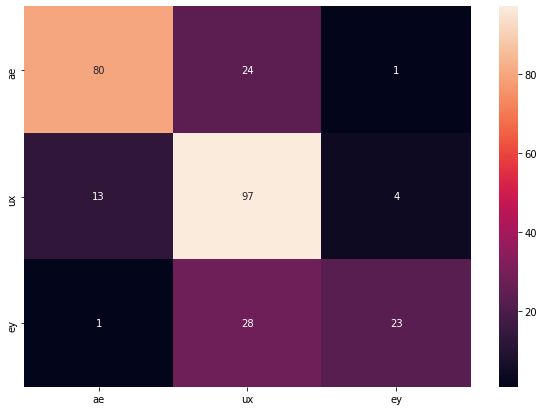

In [2]:
import seaborn as sn
from naive_bayes import GaussianNB

features = ["F1", "F2"]

# Train dataset
dataset_train = train[train["Phoneme"].isin(["ae", "ey", "ux"]) ]
X_train = dataset_train[features]
y_train = dataset_train["Phoneme"]

# Test dataset
dataset_test = test[test["Phoneme"].isin(["ae", "ey", "ux"]) ]
X_test = dataset_test[features]
y_test = dataset_test["Phoneme"]

# Train model:
gnb = GaussianNB()
gnb.train(X_train, y_train)
y_pred = gnb.classify(X_test)

# Plot confusion matrix:
df_cm = gnb.get_confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)


*Try:* To visualize the classes models and the classifier created in (b), you can:

- Plot the contours for each Gaussian distribution in the model, that is the class conditional likelihoods $P(x|c)$.
- Plot the decision regions for the Bayesian classifier.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x, y)
pdfs = gnb.get_pdfs((X, Y))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, pdfs,cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()


ValueError: operands could not be broadcast together with shapes (500,500,2) (8,) 

(c) Extend your classifier to include the features "F1"-"F4" and compare the results with those in (b). Finally use all available information "F1"-"F4" and "B1-B4". How does the performance of this classifier compare with the simpler classifiers using fewer features?

## F1 - F4

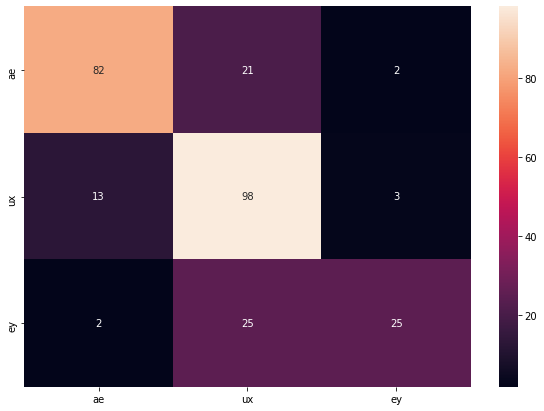

In [6]:
import seaborn as sn
from naive_bayes import GaussianNB

features = ["F1", "F2", "F3", "F4"]

# Train dataset
dataset_train = train[train["Phoneme"].isin(["ae", "ey", "ux"]) ]
X_train = dataset_train[features]
y_train = dataset_train["Phoneme"]

# Test dataset
dataset_test = test[test["Phoneme"].isin(["ae", "ey", "ux"]) ]
X_test = dataset_test[features]
y_test = dataset_test["Phoneme"]

# Train model:
gnb = GaussianNB()
gnb.train(X_train, y_train)
y_pred = gnb.classify(X_test)

# Plot confusion matrix:
df_cm = gnb.get_confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## All features

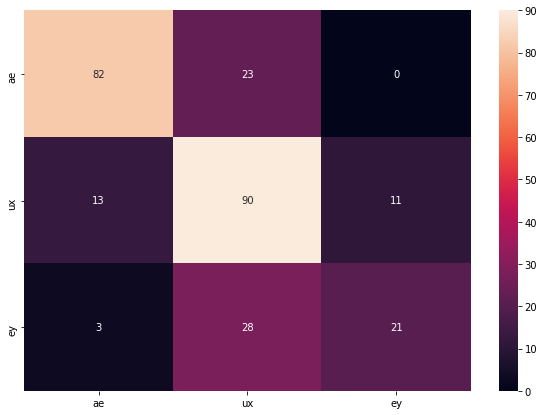

In [7]:
import seaborn as sn
from naive_bayes import GaussianNB

features = ["F1", "F2", "F3", "F4", "B1", "B2", "B3", "B4"]

# Train dataset
dataset_train = train[train["Phoneme"].isin(["ae", "ey", "ux"]) ]
X_train = dataset_train[features]
y_train = dataset_train["Phoneme"]

# Test dataset
dataset_test = test[test["Phoneme"].isin(["ae", "ey", "ux"]) ]
X_test = dataset_test[features]
y_test = dataset_test["Phoneme"]

# Train model:
gnb = GaussianNB()
gnb.train(X_train, y_train)
y_pred = gnb.classify(X_test)

# Plot confusion matrix:
df_cm = gnb.get_confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

(d) We want to make the model slightly more powerful by modeling the feature vector conditional on both the vowel and gender of speaker, that is $P(x|g,c)$, where $g$ is the gender of the speaker and $c$ is the phoneme label. Show how these models can be used for phoneme classification using marginalization over the gender.

Assume that $P(x|g,c)$ is a multivariate Gaussian and compute the maximum likelihood estimates for the models. Compare the result on the test set with the results in (c).

(e) When using Gaussian classifiers we often avoid computing the entire covariance matrix, but instead we only use the diagonal of the matrix. Repeat the results in (d) using only diagonal covariance matrices and compare the results.

### Problem 2

In this problem we use the support vector machine (SVM) to build classifiers. We use the same dataset as in Problem 1. It is up to you to select which features to use.

We use the function `sklearn.svm.SVC` from `scikit-learn` in this problem. First you need to get your data on the format that `SVC` expects, which is a matrix where every row is a feature vector, and a list of integer labels corresponding to each row. We suggest using "ae" = 0, "ey" = 1 and "ux" = 2.

An example on how to use the `SVC` is given in http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC. In short we do the following (for a linear kernel):
- Instantiate an SVC object: `cls = SVC(kernel='linear')`
- Train the SVM using the feature vector matrix `train_X`, and label vector `train_Y`: `cls.fit(train_X, train_Y)`
- Predict labels on the test set `Test_X` using: `cls.predict(Test_X)`

(a) Create a linear SVM with different penalty terms $C=\{0.1, 1, 10\}$ and compare with the results in Problem 1.

(b) Try different kernels ('rbf', 'poly', 'sigmoid') and compare the results. Choose one of the kernels and use different penalty terms $C$. What happens with the performance on the training set when you increase $C$? What happens with the performance on the test set?